## SAR images preparation, fixing encoding and pixel values for interpretability and uploading to Hub

In [4]:
from pathlib import Path

import datasets
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

from sar_denoise.dataset_transforms import make_transform_images, normalize_u8, to_u8, to_log_u8 

In [5]:
sar_path = Path("/data/sar/sar_data/sar_tiles_png_512")

out_path = Path("/data/sar/sar_tile_512")
out_path_log = Path("/data/sar/sar_tile_512_log")

In [6]:
out_path.mkdir(exist_ok=True)
out_path_log.mkdir(exist_ok=True)

Text(0.5, 1.0, 'Log U8')

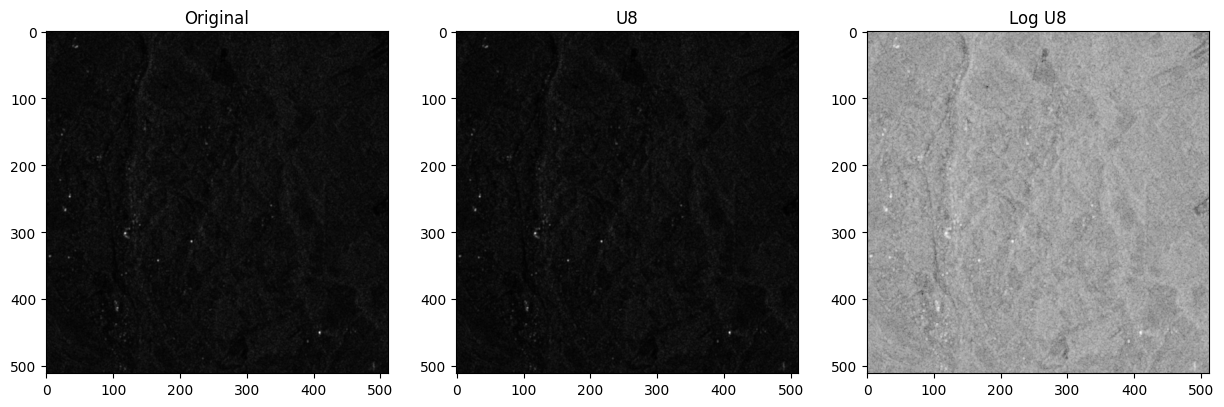

In [7]:
img_path = next(sar_path.iterdir())

img = Image.open(img_path)

# show original, u8, and log u8
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(to_u8(img), cmap='gray')
axs[1].set_title("U8")
axs[2].imshow(to_log_u8(img), cmap='gray')
axs[2].set_title("Log U8")

In [8]:
num_paths = len(list(sar_path.iterdir()))

for p in tqdm(sar_path.iterdir(), total=num_paths):
    img = Image.open(p)
    img8 = to_u8(img)
    img8.save(out_path / p.name)
    img8_log = to_log_u8(img)
    img8_log.save(out_path_log / p.name)

100%|██████████| 1673/1673 [01:19<00:00, 21.12it/s]


In [9]:
dataset = datasets.load_dataset('imagefolder', data_dir=out_path)

Resolving data files:   0%|          | 0/1673 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [10]:
from datasets import load_dataset
from huggingface_hub import notebook_login

notebook_login()

In [11]:
dataset.push_to_hub('ReginaFoley/sar_tile_512')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1673 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ReginaFoley/sar_tile_512/commit/d717c0b4e6df21c6ba6bfd116271756ff9cadb7f', commit_message='Upload dataset', commit_description='', oid='d717c0b4e6df21c6ba6bfd116271756ff9cadb7f', pr_url=None, pr_revision=None, pr_num=None)